# **ATIVIDADE 26 - Visualizando Figuras de Mérito**


**INTRODUÇÃO**

Ao longo do primeiro projeto você aprendeu a converter sua abstração (isto é, um conjunto de equações a diferença) em um programa de Python que produziu séries temporais das populações de tubarões, raias, e vieiras.  Na sequência você usou este programa para fazer algum trabalho de modelagem e, finalmente, produziu um gráfico matador para ilustrar suas conclusões.

Neste tutorial vamos nos concentrar em ir além da criação de gráficos que resumem uma única série tempo para gráficos que resumem **múltiplas** séries de tempo. Em particular, vamos nos concentrar em produzir gráficos que resumem a forma como figuras de mérito, números que caracterizam o comportamento de uma determinada série de tempo, mudam como resultado da mudança de algum aspecto do modelo (pode ser um parâmetro de modelo ou uma condição inicial). 

Vamos implementar!




**(1) Modelando a concentração de álcool no corpo**

A fim de ilustrar algumas técnicas úteis para a visualização de figuras de mérito, vamos voltar ao nosso velho amigo álco... errr .. hum ... o modelo de álcool para ser mais específico!

No tutorial anterior, sobre a farmacocinética do álcool (não se preocupe se você não estava lá, todas as informações para fazer esta atividade estão contidas neste documento), desenvolvemos uma versão simplificada do modelo de álcool a partir do artigo do  Peters, Wedel, e Schaafsma (1990) que é definido pelo seguinte modelo (figura 1) e sistema de equações diferenciais:


<img src="Modelo_2compartimentos.png"/, width=500, height=500 style="float: center; margin: 0px 0px 10px 10px"> 
Figura 1: Modelo de 2 estoques para a concentração de álcool no corpo humano


As equações diferenciais que descrevem o comportamento do sistema são:
<img src="eqs_2compartimentos.png"/, width=200, height=200 style="float: center; margin: 0px 0px 10px 10px"> 


Onde:

E(t) é a ￼￼￼￼￼￼￼￼￼￼￼￼￼￼concentração de álcool no estômago (g/L)

C(t) é a ￼￼￼￼￼￼￼￼￼￼￼￼￼￼concentração de álcool na sangue (g/L)

Eo e Co são as condicóes inciais de álcool no estômago e sangue, respeitivamente (g/L).

k, ke são as constante de reação da eliminação do álcool do estômago e do sangue, respeitivamente (1/s).

Uma vez que temos estabelecido alguns valores para os parâmetros, assim como a concentração inicial de álcool no estômago, podemos executar o nosso modelo para produzir uma série de tempo para ambos E(t) e C(t). Por exemplo, dada uma entrada de álcool, o nosso modelo pode gerar as series de tempo que mostramos no gráfico a seguir:

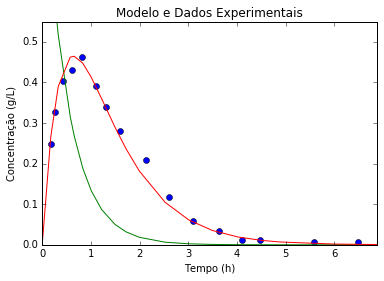

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

"""
 RetornaDadosAlcool
 Retorna os dados brutos para a concentracao de alcool:

   C,T=RetornaDadosAlcool()
   C lista com a concentração de Alcool no sangue (g/L)
   T lista com os instantes de medida (h) 
"""
def RetornaDadosAlcool():
    T = [0,
    0.17711,
    0.32959,
    0.57574,
    0.65737,
    0.83363,
    1.01054,
    1.22286,
    1.49576,
    1.72116,
    1.99386,
    2.52676,
    3.01276,
    3.49826,
    4.03046,
    4.51546,
    4.88196,
    5.99316,
    6.87976]
         
    C = [0.00139015,
    0.0158948,
    0.100132,
    0.248859,
    0.32782,
    0.402851,
    0.431829,
    0.462129,
    0.39244,
    0.338532,
    0.280685,
    0.20841,
    0.117706,
    0.0585803,
    0.0349891,
    0.0127055,
    0.0114537,
    0.00770054,
    0.00785546]
  
    return T, C

# Dados experimentais
T, Cexp = RetornaDadosAlcool() 

# Modelo, Y = [ E , C]
k = 1.2 
ke = 2 

def func2(Y,t):
    dEdt = -ke*Y[0]
    dCdt = ke*Y[0] - k*Y[1]
    return [dEdt, dCdt]

# Condição Inicial
C0 = 0.0
E0 = 1 
Y0 = [E0, C0]

# Realiza  a integração numérica
Y = odeint(func2,Y0,T)

#Inclui o atraso de 0,4 hora
Texp = [x-0.4 for x in T]  

# Mostra o resultado da simulacao junto com os dados experimentais
plt.plot(Texp, Cexp,'bo')
plt.plot(T,Y[:,0],'g')
plt.plot(T,Y[:,1],'r')
plt.axis([0, max(T), 0, 0.55])
plt.ylabel('Concentração (g/L)')
plt.xlabel('Tempo (h)')
plt.title(r'Modelo e Dados Experimentais')
plt.show()

**(2) Brainstorming Potenciais Gráficos de Figuras de Mérito**

Pense sobre o modelo farmacocinético do álcool; Que figuras de mérito interessantes poderíamos extrair da série temporal resultante? Que relações entre as características do modelo (entradas ou parâmetros) e figuras de mérito pode valer a pena investigar?

Com as pessoas sentadas na sua mesa, **tome 10 minutos** para um "brainstorm" sobre algumas figuras de mérito que podem ser interessantes visualizar. Para cada ideia, esboçar uma previsão de como seria o gráfico resultante. Você pode achar que é útil rodar o código Python fornecido com diferentes entradas e valores de parâmetros a fim de ter uma ideia de relações interessantes que o modelo poderia capturar.


**(3)** Implementar uma Função em Python que calcule a concentração de álcool no sangue em funcao do tempo, para diferentes quantidades inciais de álcool ingeridas.

In [32]:
#Ezeros = np.arange(1,5.5,0.5)
#C = []
#for CadaE0 in Ezeros:
#    Y0 = [CadaE0, C0] 
#    Y = odeint(func2,Y0,T)
#    C.append(Y)
    
#return C

# Nome função: calculaConcentracao
# Entradas
#   E0: Concentracao Inicial de Alcool no estomago
#   T: Instantes de tempo em que devem ser calculadas as concentracoes
# Saida
#   C: Lista com os valores de concentracao de alcool no sangue para os instantes de tempo.

def calculaConcentracao(E0,T):
    Y0 = [E0, C0]
    C = odeint(func2,Y0,T)
    
    return C[:,1]


**(4)** Implementar uma Função em Python que determine o maior valor de uma lista (Cmax).

In [33]:
# Nome: maximoDaLista
# Entradas
#   C: Lista com valores
# Saida
#   CMax: Maior valor na lista de entrada

def maximoDaLista(C):
    # Coloque seu codigo aqui
    return max(C)

**(5)** Implementar uma Função em Python que calcula as maximas concentracoes de álcool no sangue para todos os
valores de E0 contidos em uma lista

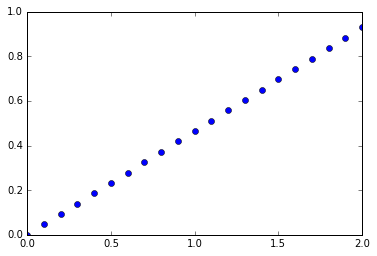

In [35]:
from numpy import linspace

# Nome: calculaConcentracoesMaximas
# Entradas
#   E0Lista: Lista com os valores da Concentracao Inicial de Alcool no estomago
#   Texp: Instantes de tempo em que devem ser calculadas as concentracoes
# Saida
#   CMaxLista: Lista com os valores máximos de concentracao

def calculaConcentracoesMaximas(E0Lista,T):
    CMaxLista = []
    for CadaE0 in E0Lista:
        Y0 = [CadaE0, C0] 
        CMaxLista.append(maximoDaLista(calculaConcentracao(CadaE0,T)))
    return CMaxLista

# Definicao de uma lista com diversos valores de concentraçao inicial 
E0Lista = linspace(0,2,21)      
len(E0Lista)
 
# plote um gráfico dos valores máximos de concentracao em funcao da concentracao inicial de alcool no estomago  
plt.plot(E0Lista, calculaConcentracoesMaximas(E0Lista, T),'bo')

plt.show()

**(6)** Implementar uma Função em Python que determina o valor da concentracao de alcool no sangue depois de x horas.